## Sentiment Analysis on Car Reviews

Choosing a car can be a big decision using sentiment analysis users can analyze mass amounts of reviews by determining positive and negative feedback. Creating a hassle-free way to narrow down a car company they would like to pursue. While also allowing car manufactures to determine positive and negative feedback with their car models and how they can use sentiment analysis to their advantage when creating next years models.

In [1]:
# First I will import needed packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# I will check my current directory with the use of os
import os
os.getcwd()

'C:\\Users\\Robyn\\DSC680\\Car_Review_Project'

## Data Import

In [3]:
# I will now pull my data set through pd to create a data frame
Car_Reviews = pd.read_csv("\\Users\\Robyn\\DSC680\\Car_Review_Project\\car_5_brands.csv")
Car_Reviews

,Unnamed: 0,Rating,car_year,brand_name,date,review
0,0,5.00,2018,Audi,2018-07-11,BEST ALL AROUND PURPOSE CROSSOVER SUV I have n...
1,1,5.00,2018,Audi,2018-06-24,Best car This is a wonderful car. The technol...
2,2,5.00,2018,Audi,2018-05-02,Great Buy Do your home work
3,3,5.00,2018,Audi,2017-12-07,Fun Car Great ride. Loaded with technology. St...
4,4,5.00,2018,Audi,2017-10-25,Best luxury SUV w/ perfect comfort/sport balan...
...,...,...,...,...,...,...
31933,31933,4.75,2015,Mercedes-Benz,2015-06-04,One week in but I love it. I just got the car...
31934,31934,4.00,2015,Mercedes-Benz,2015-05-19,A delightful car I have been driving the GLA25...
31935,31935,3.00,2015,Mercedes-Benz,2015-02-21,This car is amazing but visibility is poor We ...
31936,31936,2.75,2015,Mercedes-Benz,2015-01-20,Steering Wheel Module When I first bought this...


## Variable description

Rating - A numeric variable that gives the car brand a rating of one to five

Car_Year – The year the car was built

Brand_Name – Is the brand such as Audi, Lexus, Infiniti, BMW, or Mercedes-Benz

Date – Is the date the owner of the car created the review

Review – The review given by the costumer regard the car they purchased

## Data Review

In [4]:
# Use describe to see different statistics for the data set
Car_Reviews.describe()

,Unnamed: 0,Rating,car_year
count,31938.000000,31938.000000,31938.000000
mean,15968.500000,4.476331,2005.959296
std,9219.850785,0.783148,5.101718
min,0.000000,1.000000,1997.000000
25%,7984.250000,4.375000,2002.000000
50%,15968.500000,4.750000,2005.000000
75%,23952.750000,5.000000,2009.000000
max,31937.000000,5.000000,2018.000000


Above it is shown that the mean rating is 4.47 whle the min is 1.00 and a max of 5.00. While the mean year for all cars is 2005 while the min is 1997 and a max of 2018.

In [5]:
# I will now use isnull and sum to check for missing data
Car_Reviews.isnull().sum()

Unnamed: 0    0
Rating        0
car_year      0
brand_name    0
date          0
review        0
dtype: int64

No missing values have been detected.

In [6]:
# View how many unique values the brand_name variable has
Car_Reviews['brand_name'].unique()

array(['Audi', 'Lexus', 'INFINITI', 'BMW', 'Mercedes-Benz'], dtype=object)

Above it is shown that the five car brands within the data set are Audi, Lexus, INFINITI, BMW, and Mercedes-Benz.

In [7]:
# Next I will use Shape to display the dimensions of the dataframe
Car_Reviews.shape

(31938, 6)

The Dataframe has 6 columns and 31,938 rows of data.

In [8]:
# Info is now used to see further into each variable.
Car_Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31938 entries, 0 to 31937
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  31938 non-null  int64  
 1   Rating      31938 non-null  float64
 2   car_year    31938 non-null  int64  
 3   brand_name  31938 non-null  object 
 4   date        31938 non-null  object 
 5   review      31938 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.5+ MB


Above it is shown that the Unamed and car_year are both int64 while Rating is a float64. The remaining variables brand_name, date, and review are objects.

In [9]:
# I will now count the values for each rating
Car_Reviews.Rating.value_counts()

5.00000    9781
4.87500    5447
4.75000    3455
4.62500    2064
4.00000    1639
           ... 
4.70000       1
4.09375       1
1.56250       1
4.72500       1
3.52500       1
Name: Rating, Length: 149, dtype: int64

In [10]:
# View the unique values the Rating variable has
Car_Reviews.Rating.unique()

array([5.        , 4.        , 1.        , 3.        , 4.75      ,
       2.        , 2.625     , 3.625     , 4.25      , 4.875     ,
       4.625     , 2.25      , 4.5       , 4.375     , 4.125     ,
       3.125     , 3.25      , 3.75      , 3.875     , 3.5       ,
       3.375     , 2.125     , 2.375     , 4.5625    , 1.75      ,
       4.78125   , 4.8125    , 4.84375   , 2.875     , 4.9375    ,
       2.5       , 4.3125    , 3.8125    , 2.75      , 4.91666667,
       4.95833333, 3.4375    , 3.16666667, 3.08333333, 4.4375    ,
       4.6875    , 3.83333333, 4.16666667, 1.875     , 4.0625    ,
       2.8125    , 4.15625   , 4.71875   , 4.83333333, 4.79166667,
       1.5       , 2.9375    , 4.1875    , 1.375     , 3.6875    ,
       3.9375    , 4.41666667, 1.25      , 4.66666667, 4.70833333,
       4.58333333, 4.90625   , 4.96875   , 4.29166667, 4.45833333,
       3.91666667, 3.58333333, 3.0625    , 4.20833333, 1.125     ,
       1.625     , 3.5625    , 3.70833333, 3.3125    , 4.59375

Above it is shown that the Rating variable has many unique values that range from 1 to 5.

In [11]:
# Change date column to datetime64 data type
Car_Reviews['date'] = pd.to_datetime(Car_Reviews['date'])
print(Car_Reviews.dtypes)

Unnamed: 0             int64
Rating               float64
car_year               int64
brand_name            object
date          datetime64[ns]
review                object
dtype: object


In [12]:
# Next I will convert my ratings to be replaced with a 0 or 1
def create_sentiment(rating):
    
    if rating<=3.99:
        return 0 
    elif rating>=4:
        return 1

Car_Reviews['Updated_Rating'] = Car_Reviews['Rating'].apply(create_sentiment)

In [13]:
# Next I will view the dataframe and see the new variable Updated_Rating
Car_Reviews

,Unnamed: 0,Rating,car_year,brand_name,date,review,Updated_Rating
0,0,5.00,2018,Audi,2018-07-11,BEST ALL AROUND PURPOSE CROSSOVER SUV I have n...,1
1,1,5.00,2018,Audi,2018-06-24,Best car This is a wonderful car. The technol...,1
2,2,5.00,2018,Audi,2018-05-02,Great Buy Do your home work,1
3,3,5.00,2018,Audi,2017-12-07,Fun Car Great ride. Loaded with technology. St...,1
4,4,5.00,2018,Audi,2017-10-25,Best luxury SUV w/ perfect comfort/sport balan...,1
...,...,...,...,...,...,...,...
31933,31933,4.75,2015,Mercedes-Benz,2015-06-04,One week in but I love it. I just got the car...,1
31934,31934,4.00,2015,Mercedes-Benz,2015-05-19,A delightful car I have been driving the GLA25...,1
31935,31935,3.00,2015,Mercedes-Benz,2015-02-21,This car is amazing but visibility is poor We ...,0
31936,31936,2.75,2015,Mercedes-Benz,2015-01-20,Steering Wheel Module When I first bought this...,0


In [14]:
# I will now count the values for each rating
Car_Reviews.Updated_Rating.value_counts()

1    27144
0     4794
Name: Updated_Rating, dtype: int64

Above we can see that there are 27,144 positive reviews while we see 4,794 negative and neutral reviews. 

In [15]:
# Will now update Rating variable to int64
Car_Reviews['Rating'] = Car_Reviews['Rating'].apply(np.int64)

In [16]:
# Next display dtypes
display(Car_Reviews.dtypes)

Unnamed: 0                 int64
Rating                     int64
car_year                   int64
brand_name                object
date              datetime64[ns]
review                    object
Updated_Rating             int64
dtype: object

## Data Preparation and Natural language processing

In [17]:
# First I will use info to view each variable
Car_Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31938 entries, 0 to 31937
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      31938 non-null  int64         
 1   Rating          31938 non-null  int64         
 2   car_year        31938 non-null  int64         
 3   brand_name      31938 non-null  object        
 4   date            31938 non-null  datetime64[ns]
 5   review          31938 non-null  object        
 6   Updated_Rating  31938 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.7+ MB


In [18]:
# Import needed libraries
!pip install nltk
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
nltk.download('wordnet')
import warnings

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Robyn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Implementing Lowercase

In [19]:
# Next I will use Natural language processing to edit the reviews for each car brand.By changing Review text to lowercase 
Car_Reviews['Updated_Review']= Car_Reviews['review'].apply(lambda x: x.lower())

### Punctuation Removal

In [20]:
# Next remove punctuation  
def punctuation_removal(text):
    text = " ".join([word.strip(string.punctuation) for word in text.split(" ")])
    return text
Car_Reviews['Updated_Review'] = Car_Reviews['Updated_Review'].apply(punctuation_removal)

### Remove Imbedded Numbers

In [21]:
# Next I will use isdigit and apply to remove imbedded numbers
def remove_number(text):
    text = "".join([word for word in text if not any(c.isdigit() for c in word)])
    return text
Car_Reviews['Updated_Review'] = Car_Reviews['Updated_Review'].apply(remove_number)

## Create Tokens

In [22]:
# Import needed libraries
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
warnings.filterwarnings('ignore')
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

In [23]:
# Create tokens through the use of split 
def token(text):
    text = text.split()
    return text
Car_Reviews['Updated_Review'] = Car_Reviews['Updated_Review'].apply(token)

## Stop Word Removal

In [24]:
# Import stop words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Robyn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Set stop words to english
brand_stop_words = set(stopwords.words('english'))
brand_names = ['Audi', 'Lexus', 'INFINITI', 'BMW', 'Mercedes', 'Benz']
punctuation_string = string.punctuation

In [26]:
# Next I will remove the stopwords from my Review_update
def remove_stopword(text): 
    stop = stopwords.words('english')
    text = [x for x in text if x not in brand_stop_words and x not in brand_names and x not in punctuation_string] 
    return text
Car_Reviews['Updated_Review'] = Car_Reviews['Updated_Review'].apply(remove_stopword)

In [27]:
# Import needed package
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Robyn\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Convert and Join Words

In [28]:
# Next I will use WordNetLemmatizer convert words used in review to base words
def word_lemmatize(text):
    text = [WordNetLemmatizer().lemmatize(word) for word in text]
    return text
Car_Reviews['Updated_Review'] = Car_Reviews['Updated_Review'].apply(word_lemmatize)

In [29]:
# Join my Review data values
def join_review_data(text):
    text = " ".join(text)
    return text
Car_Reviews['Updated_Review'] = Car_Reviews['Updated_Review'].apply(join_review_data)

## Implement Vader

In [30]:
# Install needed library
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [31]:
# Next I create a polarity variable 
Car_Reviews['Review_Polarity'] = Car_Reviews['Rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3 else 'Negative'))
Car_Reviews

,Unnamed: 0,Rating,car_year,brand_name,date,review,Updated_Rating,Updated_Review,Review_Polarity
0,0,5,2018,Audi,2018-07-11,BEST ALL AROUND PURPOSE CROSSOVER SUV I have n...,1,best around purpose crossover suv never seen d...,Positive
1,1,5,2018,Audi,2018-06-24,Best car This is a wonderful car. The technol...,1,best car wonderful car technology adaptable ca...,Positive
2,2,5,2018,Audi,2018-05-02,Great Buy Do your home work,1,great buy home work,Positive
3,3,5,2018,Audi,2017-12-07,Fun Car Great ride. Loaded with technology. St...,1,fun car great ride loaded technology steering ...,Positive
4,4,5,2018,Audi,2017-10-25,Best luxury SUV w/ perfect comfort/sport balan...,1,best luxury suv w perfect comfort/sport balanc...,Positive
...,...,...,...,...,...,...,...,...,...
31933,31933,4,2015,Mercedes-Benz,2015-06-04,One week in but I love it. I just got the car...,1,one week love got car procrastinating couple w...,Positive
31934,31934,4,2015,Mercedes-Benz,2015-05-19,A delightful car I have been driving the GLA25...,1,delightful car driving gla half year absolutel...,Positive
31935,31935,3,2015,Mercedes-Benz,2015-02-21,This car is amazing but visibility is poor We ...,0,car amazing visibility poor longer car rear wi...,Neutral
31936,31936,2,2015,Mercedes-Benz,2015-01-20,Steering Wheel Module When I first bought this...,0,steering wheel module first bought car love wi...,Negative


In [32]:
# I will use SentimentIntensityAnalyzer to calculat the vader rating 
vader_analyzer=SentimentIntensityAnalyzer()
vader = []

for i in Car_Reviews['Updated_Review']:
    score = vader_analyzer.polarity_scores(i)
    vader.append(score['compound'])
Car_Reviews['Rating_Vader'] = vader

In [33]:
# I will also determine the rating of each value by setting the vader to positive, negative, or neutral
Car_Reviews['Polarity_Vader_Review'] = Car_Reviews['Rating_Vader'].apply(lambda x: 'Positive' if x > 0 else('Neutral' if x == 0 else 'Negative'))
Car_Reviews.head()

,Unnamed: 0,Rating,car_year,brand_name,date,review,Updated_Rating,Updated_Review,Review_Polarity,Rating_Vader,Polarity_Vader_Review
0,0,5,2018,Audi,2018-07-11,BEST ALL AROUND PURPOSE CROSSOVER SUV I have n...,1,best around purpose crossover suv never seen d...,Positive,0.9887,Positive
1,1,5,2018,Audi,2018-06-24,Best car This is a wonderful car. The technol...,1,best car wonderful car technology adaptable ca...,Positive,0.9590,Positive
2,2,5,2018,Audi,2018-05-02,Great Buy Do your home work,1,great buy home work,Positive,0.6249,Positive
3,3,5,2018,Audi,2017-12-07,Fun Car Great ride. Loaded with technology. St...,1,fun car great ride loaded technology steering ...,Positive,0.8126,Positive
4,4,5,2018,Audi,2017-10-25,Best luxury SUV w/ perfect comfort/sport balan...,1,best luxury suv w perfect comfort/sport balanc...,Positive,0.9932,Positive


### Implement Label Encoder

In [34]:
# I will now use LabelEncoder on my 'Review_Polarity','Polarity_Vader_Review'
label_encode = LabelEncoder()
for i in ['Review_Polarity','Polarity_Vader_Review']:
    Car_Reviews[i] = label_encode.fit_transform(Car_Reviews[i])

## Data Visualizations

### Average Rating by Brand Name

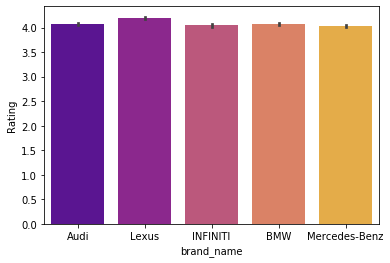

In [35]:
# First I will create a barplot for each brand that shows the average rating with seaborn
import seaborn as sns
sns.barplot(x ='brand_name', y ='Rating', data = Car_Reviews,  
            palette ='plasma')

Above we can see that the average rating of each brand is around a four out of five.

### Number of Reviews by Car Model Year

[Text(0.5, 1.0, 'Count Per Ratings Per Year')]

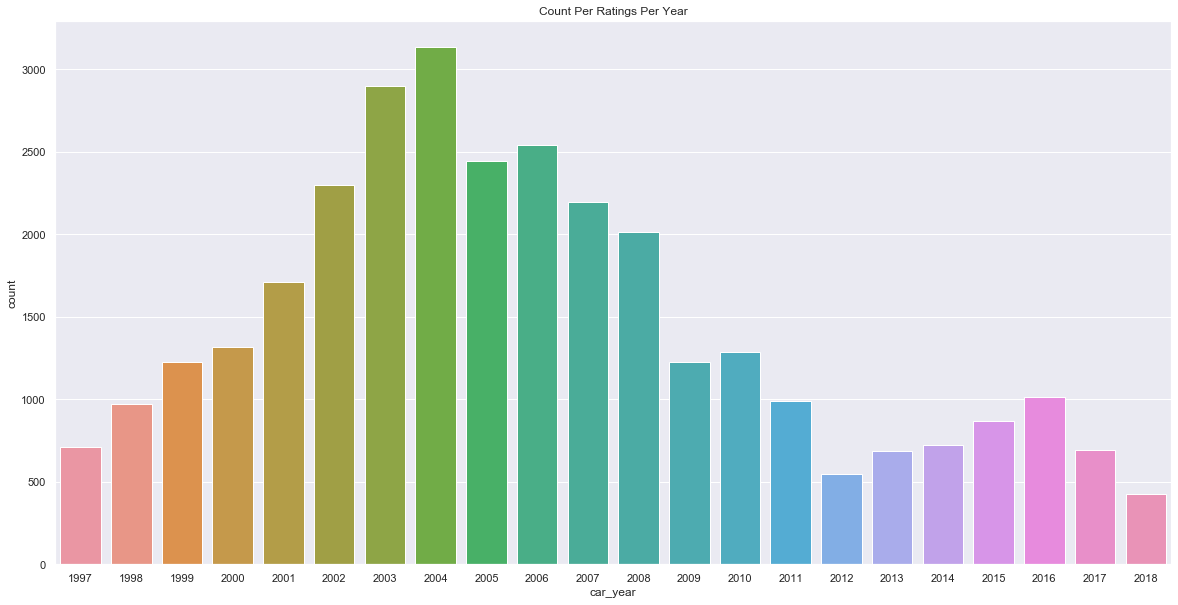

In [36]:
# Next I will create a plot that shows the number of reviews per car model year 
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x ='car_year', data = Car_Reviews).set(title='Count Per Ratings Per Year') 

Above the plot shows that 2004 car brands was the year with the largest amount of reviews

### Rating Count Percentage

In [37]:
# First I will create rate value for the car reviews.
rate_value = Car_Reviews.Rating.value_counts()

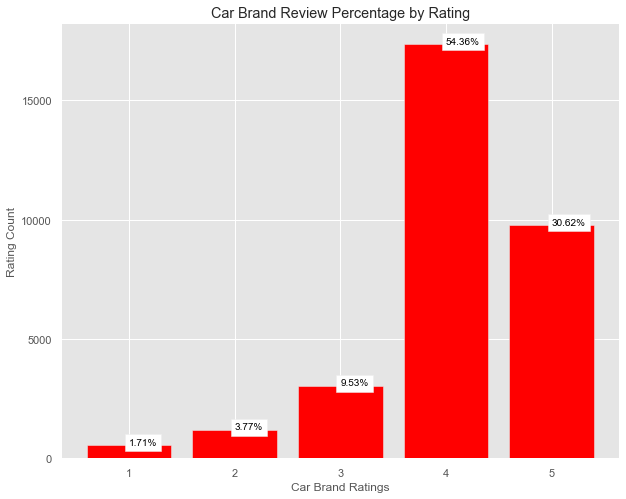

In [38]:
# Create a bar plot that shows the percentage of ratings
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 8))
    plt.bar(rate_value.index, rate_value.values, color='red')
    for rating, value in zip(rate_value.index, rate_value.values):
        plt.text(rating, value, str(round(value/sum(rate_value.values)*100, 2))+'%', 
                color='black', bbox=dict(facecolor='white'))
    plt.title('Car Brand Review Percentage by Rating')
    plt.xlabel('Car Brand Ratings')
    plt.ylabel('Rating Count')
    plt.yticks(np.arange(0, 20000, 5000))

Above we see that on the rating scale a rating of four has been given the most with 54.36% while a rating of one has only been givem 1.71%.

### Vader Rating by date for each Car Brand

In [39]:
!pip install plotly
import plotly.express as px

In [ ]:
# I will create a scatter that shows the Vader rating throughout the years for each brand
fig = px.scatter(Car_Reviews,
          x='date',
          y='Rating_Vader',
          color='brand_name',
          size='Updated_Rating')
fig.show()

The above scatter plot looks overwhelming when all brands are shown. But on the right side you can click each brand on and off to get a better look at each brand. When you go through each brand you will see that Mercedes has the largest number of reviews and infinity has the least. While Lexus shows the largest number of reviews from 2016 forwad. 

### Car Brand Review Percentage by Polarity Vader Review

In [41]:
# First I will create rate value for the car reviews.
rate_value = Car_Reviews.Polarity_Vader_Review.value_counts()

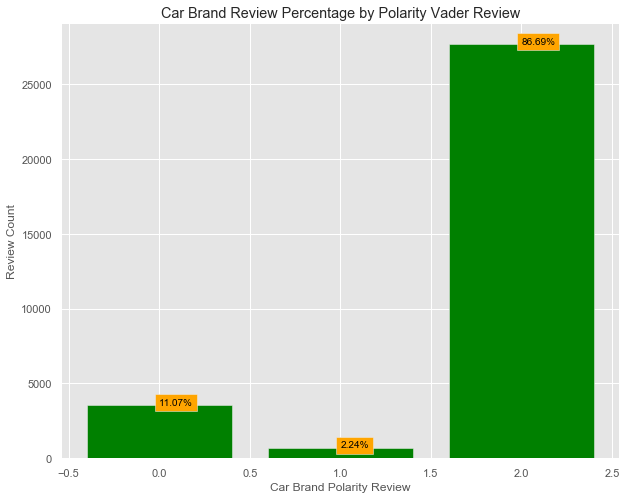

In [42]:
# Create a bar plot that shows the percentage of ratings
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 8))
    plt.bar(rate_value.index, rate_value.values, color='green')
    for rating, value in zip(rate_value.index, rate_value.values):
        plt.text(rating, value, str(round(value/sum(rate_value.values)*100, 2))+'%', 
                color='black', bbox=dict(facecolor='orange'))
    plt.title('Car Brand Review Percentage by Polarity Vader Review')
    plt.xlabel('Car Brand Polarity Review')
    plt.ylabel('Review Count')
    plt.yticks(np.arange(0, 30000, 5000))

The above bar chart for Car Brand Polarity Vader Review Percentages shows a higher percentage for positive while negative reviews shos 11.07% with a 2.24% for neutral.

## Modeling

In [43]:
# Now I will split the Car review data into a training and test sets
Target_data = ['Updated_Review']
Predict_data= ['Review_Polarity']
X=Car_Reviews[Target_data].values
Y=Car_Reviews[Predict_data].values
x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify=Y, test_size=.4, random_state=0)

In [44]:
# View the shape for my training and test sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
np.unique(y_train, return_counts=True)

(19162, 1)
(12776, 1)
(19162, 1)
(12776, 1)


(array([0, 1, 2]), array([ 1050,  1826, 16286], dtype=int64))

## TFIDF Training Set Data

In [45]:
# Create TfidfVectorizer feature for the x_train
tfidf_train_data = TfidfVectorizer()
x_train_vector = tfidf_train_data.fit_transform(x_train.ravel())

In [46]:
# Pull TfidfVectorizer train shape
x_train_vector.shape

(19162, 21980)

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
# logistic regression model with train data
logistic_model = LogisticRegression()
logistic_model = logistic_model.fit(x_train_vector, y_train)
print(logistic_model.score(x_train_vector, y_train))

0.9149358104581985


## Random Forest Analysis

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
# Random Forest Classifier accuracy on the train set
Random_Forest = RandomForestClassifier(max_depth = 300, random_state = 80)
Random_Forest.fit(x_train_vector, y_train.ravel())
print(Random_Forest.score(x_train_vector, y_train.ravel()))

0.9995303204258428


As seen above the Random Forest had an accuracy of 99.95% and the Logistic Regression had a accuracy of 91.49%

## Brand Review

[Text(0.5, 1.0, 'Vader Ratings per Year')]

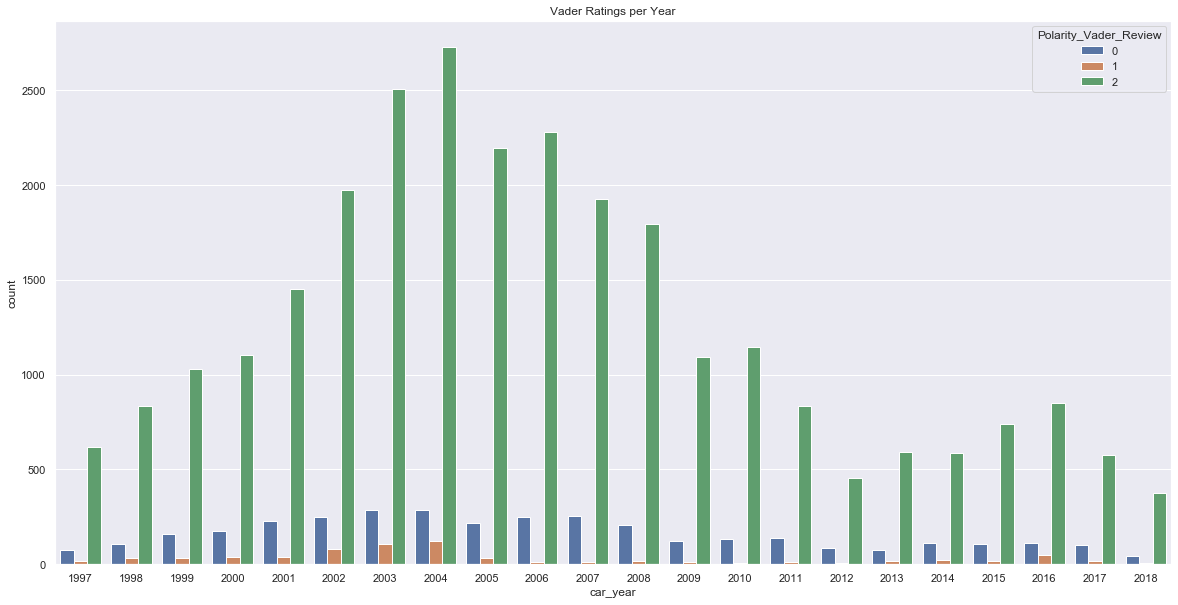

In [51]:
# First I will view the vader rating per year
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(data = Car_Reviews, x = 'car_year', hue = 'Polarity_Vader_Review').set(title='Vader Ratings per Year')

Above it is seen that positive reviews weigh out both neutral and negative reviews as the 2004 models had the highest number of reviews compared to other years which saw over 2000 positive reviews with less than 500 negative and neutral reviews 

[Text(0.5, 1.0, 'Vader Ratings by Brand per Year')]

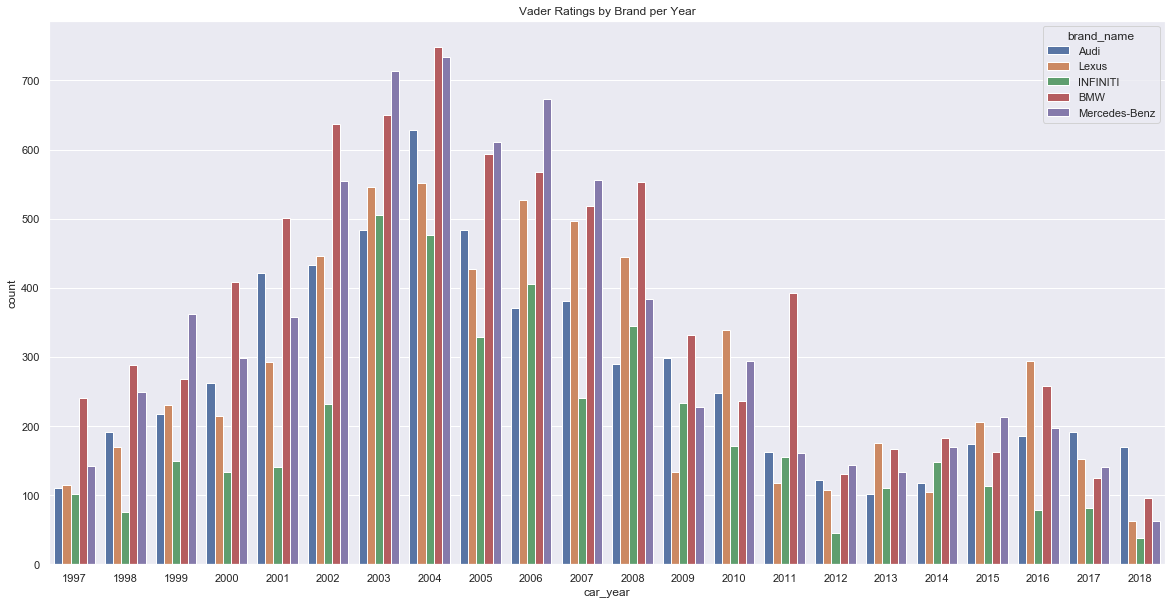

In [52]:
# I will use seaborn to create a vizualization that shows all ratings by brand.
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(data = Car_Reviews, x = 'car_year', hue = 'brand_name').set(title='Vader Ratings by Brand per Year')

Above the seaborn graph shows BMW and Mercedes with the highest number of reviews for 2004 with over 700 for both while audi saw over 600, lexus saw around 550, and Infiniti saw around 480 in 2004. While in 2018 the graph indicated Audi had the highest number of reviews with around 180 while BMW had around 90 reviews. Then Mercedes and Lexus had around 50 and Infiniti saw around 30 reviews. 

## Dummy Variable Created Per Brand

In [53]:
# Dummy variables created for each brand 
brand = pd.get_dummies(Car_Reviews['brand_name'])
Car_Reviews = pd.concat([Car_Reviews,brand],axis=1)
Car_Reviews

,Unnamed: 0,Rating,car_year,brand_name,date,review,Updated_Rating,Updated_Review,Review_Polarity,Rating_Vader,Polarity_Vader_Review,Audi,BMW,INFINITI,Lexus,Mercedes-Benz
0,0,5,2018,Audi,2018-07-11,BEST ALL AROUND PURPOSE CROSSOVER SUV I have n...,1,best around purpose crossover suv never seen d...,2,0.9887,2,1,0,0,0,0
1,1,5,2018,Audi,2018-06-24,Best car This is a wonderful car. The technol...,1,best car wonderful car technology adaptable ca...,2,0.9590,2,1,0,0,0,0
2,2,5,2018,Audi,2018-05-02,Great Buy Do your home work,1,great buy home work,2,0.6249,2,1,0,0,0,0
3,3,5,2018,Audi,2017-12-07,Fun Car Great ride. Loaded with technology. St...,1,fun car great ride loaded technology steering ...,2,0.8126,2,1,0,0,0,0
4,4,5,2018,Audi,2017-10-25,Best luxury SUV w/ perfect comfort/sport balan...,1,best luxury suv w perfect comfort/sport balanc...,2,0.9932,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31933,31933,4,2015,Mercedes-Benz,2015-06-04,One week in but I love it. I just got the car...,1,one week love got car procrastinating couple w...,2,0.9794,2,0,0,0,0,1
31934,31934,4,2015,Mercedes-Benz,2015-05-19,A delightful car I have been driving the GLA25...,1,delightful car driving gla half year absolutel...,2,0.9746,2,0,0,0,0,1
31935,31935,3,2015,Mercedes-Benz,2015-02-21,This car is amazing but visibility is poor We ...,0,car amazing visibility poor longer car rear wi...,1,0.9669,2,0,0,0,0,1
31936,31936,2,2015,Mercedes-Benz,2015-01-20,Steering Wheel Module When I first bought this...,0,steering wheel module first bought car love wi...,0,-0.2023,0,0,0,0,0,1


The creation of dummy variables will allow me to further evaluate each brand.

## Models By Brand
## Audi Model

In [ ]:
# Create a histogram that also shows reviews by year
fig = px.histogram(Car_Reviews, x="car_year", y="Rating_Vader", color="brand_name", marginal="rug", hover_data=Car_Reviews.columns)
fig.show()

In [55]:
# Now I will split the Car review data into a training and test sets for Audi
Target_data = ['Updated_Review']
Predict_data= ['Audi']
X=Car_Reviews[Target_data].values
Y=Car_Reviews[Predict_data].values
x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify=Y, test_size=.4, random_state=0)

In [56]:
# View the shape for my training and test sets for Audi
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
np.unique(y_train, return_counts=True)

(19162, 1)
(12776, 1)
(19162, 1)
(12776, 1)


(array([0, 1], dtype=uint8), array([15536,  3626], dtype=int64))

In [57]:
# Create TfidfVectorizer feature for the x_train
tfidf_train_data = TfidfVectorizer()
audi_x_train_vector = tfidf_train_data.fit_transform(x_train.ravel())

In [58]:
# Pull TfidfVectorizer train shape
audi_x_train_vector.shape

(19162, 22105)

In [59]:
# View the Audi logistic regression model with train data
audi_logistic_model = LogisticRegression()
audi_logistic_model = logistic_model.fit(audi_x_train_vector, y_train)
audi_score = audi_logistic_model.score(audi_x_train_vector, y_train)
audi_score

0.9061162717879135

## BMW Model

In [ ]:
# Create a histogram that also shows reviews by year
fig = px.histogram(Car_Reviews, x="car_year", y="Rating_Vader", color="brand_name", marginal="rug", hover_data=Car_Reviews.columns)
fig.show()

In [61]:
# Now I will split the Car review data into a training and test sets for BMW
Target_data = ['Updated_Review']
Predict_data= ['BMW']
X=Car_Reviews[Target_data].values
Y=Car_Reviews[Predict_data].values
x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify=Y, test_size=.4, random_state=0)

In [62]:
# View the shape for my training and test sets for BMW
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
np.unique(y_train, return_counts=True)

(19162, 1)
(12776, 1)
(19162, 1)
(12776, 1)


(array([0, 1], dtype=uint8), array([14326,  4836], dtype=int64))

In [63]:
# Create TfidfVectorizer feature for the x_train
tfidf_train_data = TfidfVectorizer()
BMW_x_train_vector = tfidf_train_data.fit_transform(x_train.ravel())

In [64]:
# Pull TfidfVectorizer train shape
BMW_x_train_vector.shape

(19162, 21979)

In [65]:
# View the Audi logistic regression model with train data
BMW_logistic_model = LogisticRegression()
BMW_logistic_model = logistic_model.fit(BMW_x_train_vector, y_train)
BMW_score = BMW_logistic_model.score(BMW_x_train_vector, y_train)
BMW_score

0.8776745642417284

## Infiniti Model

In [ ]:
# Create a histogram that also shows reviews by year
fig = px.histogram(Car_Reviews, x="car_year", y="Rating_Vader", color="brand_name", marginal="rug", hover_data=Car_Reviews.columns)
fig.show()

In [67]:
# Now I will split the Car review data into a training and test sets for Infiniti
Target_data = ['Updated_Review']
Predict_data= ['INFINITI']
X=Car_Reviews[Target_data].values
Y=Car_Reviews[Predict_data].values
x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify=Y, test_size=.4, random_state=0)

In [68]:
# View the shape for my training and test sets for Infiniti
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
np.unique(y_train, return_counts=True)

(19162, 1)
(12776, 1)
(19162, 1)
(12776, 1)


(array([0, 1], dtype=uint8), array([16578,  2584], dtype=int64))

In [69]:
# Create TfidfVectorizer feature for the x_train
tfidf_train_data = TfidfVectorizer()
Infiniti_x_train_vector = tfidf_train_data.fit_transform(x_train.ravel())

In [70]:
# Pull TfidfVectorizer train shape
Infiniti_x_train_vector.shape

(19162, 22035)

In [71]:
# View the Infiniti logistic regression model with train data
Infiniti_logistic_model = LogisticRegression()
Infiniti_logistic_model = logistic_model.fit(Infiniti_x_train_vector, y_train)
Infiniti_score = Infiniti_logistic_model.score(Infiniti_x_train_vector, y_train)
Infiniti_score

0.9141008245485858

## Lexus Model

In [ ]:
# Create a histogram that also shows reviews by year
fig = px.histogram(Car_Reviews, x="car_year", y="Rating_Vader", color="brand_name", marginal="rug", hover_data=Car_Reviews.columns)
fig.show()

In [73]:
# Now I will split the Car review data into a training and test sets for Lexus
Target_data = ['Updated_Review']
Predict_data= ['Lexus']
X=Car_Reviews[Target_data].values
Y=Car_Reviews[Predict_data].values
x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify=Y, test_size=.4, random_state=0)

In [74]:
# View the shape for my training and test sets for Lexus
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
np.unique(y_train, return_counts=True)

(19162, 1)
(12776, 1)
(19162, 1)
(12776, 1)


(array([0, 1], dtype=uint8), array([15470,  3692], dtype=int64))

In [75]:
# Create TfidfVectorizer feature for the x_train
tfidf_train_data = TfidfVectorizer()
Lexus_x_train_vector = tfidf_train_data.fit_transform(x_train.ravel())

In [76]:
# Pull TfidfVectorizer train shape
Lexus_x_train_vector.shape

(19162, 22017)

In [77]:
# View the Infiniti logistic regression model with train data
Lexus_logistic_model = LogisticRegression()
Lexus_logistic_model = logistic_model.fit(Lexus_x_train_vector, y_train)
Lexus_score = Lexus_logistic_model.score(Lexus_x_train_vector, y_train)
Lexus_score

0.9010019830915353

## Mercedes-Benz Model

In [ ]:
# Create a histogram that also shows reviews by year
fig = px.histogram(Car_Reviews, x="car_year", y="Rating_Vader", color="brand_name", marginal="rug", hover_data=Car_Reviews.columns)
fig.show()

In [79]:
# Now I will split the Car review data into a training and test sets for Mercedes-Benz
Target_data = ['Updated_Review']
Predict_data= ['Mercedes-Benz']
X=Car_Reviews[Target_data].values
Y=Car_Reviews[Predict_data].values
x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify=Y, test_size=.4, random_state=0)

In [80]:
# View the shape for my training and test sets for Mercedes-Benz
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
np.unique(y_train, return_counts=True)

(19162, 1)
(12776, 1)
(19162, 1)
(12776, 1)


(array([0, 1], dtype=uint8), array([14737,  4425], dtype=int64))

In [81]:
# Create TfidfVectorizer feature for the x_train
tfidf_train_data = TfidfVectorizer()
Mercedes_x_train_vector = tfidf_train_data.fit_transform(x_train.ravel())

In [82]:
# Pull TfidfVectorizer train shape
Mercedes_x_train_vector.shape

(19162, 22100)

In [83]:
# View the Infiniti logistic regression model with train data
Mercedes_logistic_model = LogisticRegression()
Mercedes_logistic_model = logistic_model.fit(Mercedes_x_train_vector, y_train)
Mercedes_score = Mercedes_logistic_model.score(Mercedes_x_train_vector, y_train)
Mercedes_score

0.8843022648992799

## Brand Model Overview

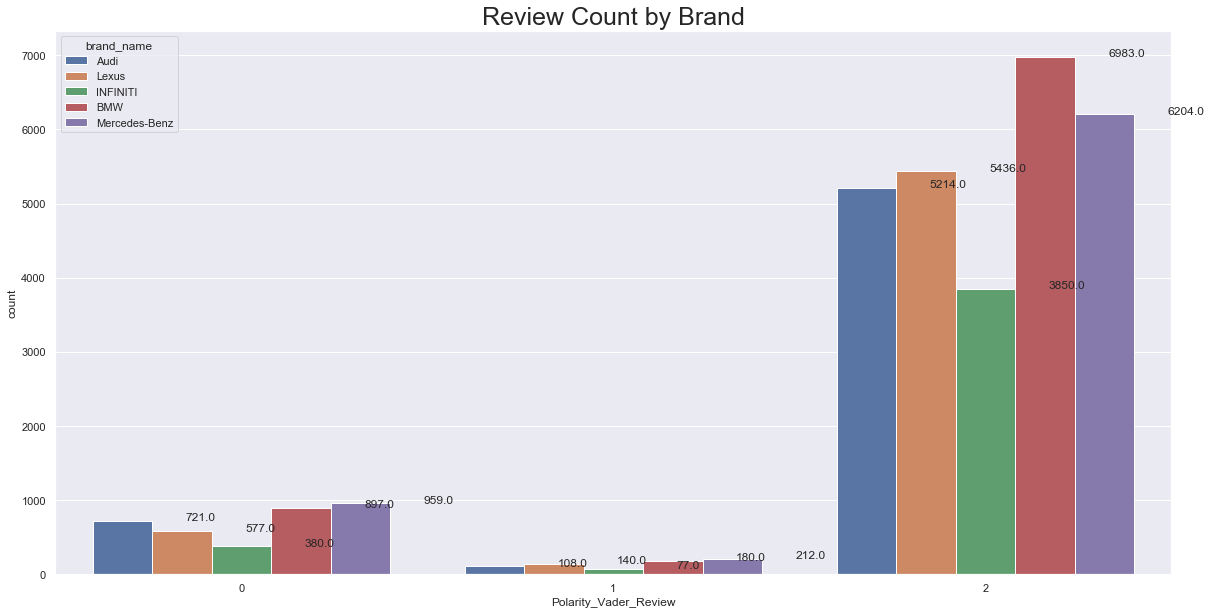

In [93]:
# Using seaborn you can see the number of positive, neutral, and negative reviews for each brand
plt.title("Review Count by Brand", fontdict = {'fontsize': 25})
ax = sns.countplot(x = "Polarity_Vader_Review", hue = 'brand_name', data = Car_Reviews)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [ ]:
# Create a histogram that also shows reviews by year
fig = px.histogram(Car_Reviews, x="car_year", y="Rating_Vader", color="brand_name", marginal="rug", hover_data=Car_Reviews.columns)
fig.show()

In [85]:
print("Audi:", audi_score)
print("BMW:", BMW_score)
print("Infiniti:", Infiniti_score)
print("Lexus:", Lexus_score)
print("Mercedes-Benz:", Mercedes_score)

Audi: 0.9061162717879135
BMW: 0.8776745642417284
Infiniti: 0.9141008245485858
Lexus: 0.9010019830915353
Mercedes-Benz: 0.8843022648992799


Above the logistic regressions that have been created for all car brands produced interesting outcomes as Infiniti saw the highest accuracy at 91.41% while BMW saw the lowest accurcy coming in at 87.77%. Which I found pretty interesting as the histogram used above showed that the BMW had the highest sum of vader rating coming in at 516.60 while Infiniti vader sumwas 361.81. While we also can see that in the count plot that BMW had the highest count of positive reviews coming in at 6,983 while Infiniti saw the lowest number of positive reviews coming in at 3,850. Mercedes had the highest count of ngative reviews coming in at 959 while Infiniti saw 380 bad reviews. 